# Workflow for producing a full issue

Please see readme for notes on using ctpy

The test case is comitted to the git repo. 
You will need to delete raw_chapters/test/ to rebuild from scratch

In [1]:
%matplotlib widget
import ctpy as ct
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Use the API key from .env OR set it as None
try:
    api_key = os.getenv('API_KEY')
except:
    api_key = None

In [2]:
# name will determine the name used in raw_chapeters and final_chapters
# url is used only for scrape()
test = ct.issue(
    name='example',
    url = None, # None uses test_images
    api_key = api_key
    )


In [3]:
# scrapes .jpegs from the specified url

# tested working with newtoki and mangademon
test.scrape()

In [4]:
#ct.split_file('raw_chapters/issue260/raw_images/page_num_69.jpeg')

In [5]:
test.downsample(scale_factor=1.0)

In [ ]:
# pages can be combined, but we will leave them separate in the test

#test.combine_pages(1,2)

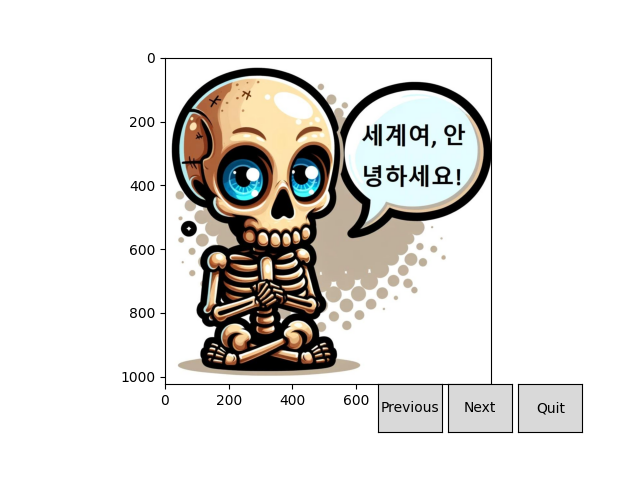

In [6]:
# this can be buggy/laggy
# use start = , stop =  to only load a smaller number of images
drawer = ct.BoxDrawer(test)
drawer.draw()

In [7]:
# check raw_chapters/test/gpt_images/
test.combine_gpt_and_ocr()

In [8]:
# pipe those images to the AI
# prompt will be saved in raw_chapters/test/prompts
# response saved in raw_chapters/test/response -and- /text
test.translate()

In [9]:
# pdf is formatted automatically
# It can be weird if your images are too big or small
test.make_pdf()

# this test may report 'failed response'
# check the response, sometimes GPT just says no.
